In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
corolla18 = pd.read_excel('toyota_corolla_2018.ods',parse_dates=['Date of sale'])

In [3]:
corolla18.shape

(990, 25)

In [4]:
corolla18.head()

,Sold status,Final bid,Mileage,Primary Damage,Secondary Damage,Year,VIN,Condition,Auction,Lot number,...,Estimated Retail Value,Estimated Repair Cost,Transmission,Body color,Drive,Fuel,Keys,Notes,URL,Car images
0,Sold,3250,67667 miles (Actual),Front End,Normal Wear,2018,5YFBURHE2JP738858,Run And Drive,Copart,50938591,...,0.0,≈ 0,Automatic,Gray,d Drive,Gas,Yes,Not specified,https://en.bidfax.info/toyota/corolla/9694904-...,{'https://bidfax.info/uploads/posts/2021-07/25...
1,Sold,4200,42144 miles (Actual),Front End,Minor Dent/Scratches,2018,5YFBURHE5JP825329,Run And Drive,Copart,48026441,...,16793.0,≈ 14035,Automatic,Red,d Drive,Gas,Yes,Not specified,https://en.bidfax.info/toyota/corolla/9692638-...,{'https://bidfax.info/uploads/posts/2021-07/24...
2,Sold,1300,0 miles (Not Actual),Front End,Side,2018,5YFBURHE3JP739999,Enhanced Vehicles,Copart,45729681,...,14914.0,≈ 25629,Automatic,Blue,Front-Wheel Drive,Gas,No,Not specified,https://en.bidfax.info/toyota/corolla/9690943-...,{'https://counter.yadro.ru/hit?t45.11;rhttps%3...
3,Sold,3900,74597 miles (Actual),Front End,Rear End,2018,2T1BURHE8JC053733,Run And Drive,Copart,44349881,...,0.0,≈ 0,Automatic,Silver,d Drive,Gas,Yes,Not specified,https://en.bidfax.info/toyota/corolla/9690100-...,{'https://bidfax.info/uploads/posts/2021-07/24...
4,Sold,4450,45516 miles (Actual),Rear End,Not specified,2018,2T1BPRHE1JC037588,Run And Drive,Copart,44220571,...,14177.0,≈ 10509,Automatic,Blue,d Drive,Gas,Yes,Veh Loc @ Mulberry Sublot,https://en.bidfax.info/toyota/corolla/9690043-...,{'https://bidfax.info/uploads/posts/2021-07/24...


In [5]:
corolla18.describe()

,Final bid,Year,Lot number,Estimated Retail Value
count,990.000000,990.0,9.900000e+02,984.000000
mean,4593.464646,2018.0,3.656639e+07,13974.391260
std,1809.381578,0.0,7.244993e+06,3029.690904
min,275.000000,2018.0,2.725562e+07,0.000000
25%,3331.250000,2018.0,3.019183e+07,12548.000000
50%,4400.000000,2018.0,3.338094e+07,14197.000000
75%,5600.000000,2018.0,4.278428e+07,15653.000000
max,12900.000000,2018.0,6.108484e+07,23156.000000


In [6]:
damages = set(corolla18['Primary Damage'].values)
for damage in damages:
    print(damage+'\n')
    print(corolla18[corolla18['Primary Damage']==damage].describe())
    print('\n\n')

Burn

       Final bid    Year  Lot number  Estimated Retail Value
count        1.0     1.0         1.0                     1.0
mean      1700.0  2018.0  33980281.0                 17748.0
std          NaN     NaN         NaN                     NaN
min       1700.0  2018.0  33980281.0                 17748.0
25%       1700.0  2018.0  33980281.0                 17748.0
50%       1700.0  2018.0  33980281.0                 17748.0
75%       1700.0  2018.0  33980281.0                 17748.0
max       1700.0  2018.0  33980281.0                 17748.0



Front and Rear

         Final bid    Year    Lot number  Estimated Retail Value
count    51.000000    51.0  5.100000e+01               50.000000
mean   3566.176471  2018.0  2.999510e+07            13955.800000
std    1335.962420     0.0  5.024097e+05             2131.487533
min    1225.000000  2018.0  2.824138e+07            10245.000000
25%    2625.000000  2018.0  2.985704e+07            12031.000000
50%    3500.000000  2018.0  3.014112

         Final bid    Year    Lot number  Estimated Retail Value
count     2.000000     2.0  2.000000e+00                2.000000
mean   5850.000000  2018.0  5.039568e+07            17561.000000
std     919.238816     0.0  1.426778e+06             2423.962046
min    5200.000000  2018.0  4.938679e+07            15847.000000
25%    5525.000000  2018.0  4.989123e+07            16704.000000
50%    5850.000000  2018.0  5.039568e+07            17561.000000
75%    6175.000000  2018.0  5.090012e+07            18418.000000
max    6500.000000  2018.0  5.140456e+07            19275.000000



Mechanical

         Final bid    Year    Lot number  Estimated Retail Value
count     4.000000     4.0  4.000000e+00                4.000000
mean   7425.000000  2018.0  4.240782e+07            15727.250000
std    2440.457607     0.0  4.439632e+06             2413.589495
min    3800.000000  2018.0  3.574860e+07            13811.000000
25%    7175.000000  2018.0  4.236842e+07            14641.250000
50%    840

In [7]:
vins = {'J':'Japan','2':'Canada','5':'USA'}
for VIN in vins:
    print(str(vins[VIN])+'\n')
    print(corolla18[corolla18['VIN'].str.startswith(VIN)].describe())
    print('\n\n')

Japan

         Final bid    Year    Lot number  Estimated Retail Value
count    42.000000    42.0  4.200000e+01               42.000000
mean   3873.214286  2018.0  3.759357e+07            14344.523810
std    1846.076862     0.0  7.413886e+06             3179.763454
min    1000.000000  2018.0  2.908619e+07                0.000000
25%    2975.000000  2018.0  3.021181e+07            13426.250000
50%    3550.000000  2018.0  3.894577e+07            14817.000000
75%    4900.000000  2018.0  4.357564e+07            15892.000000
max    8700.000000  2018.0  5.965335e+07            20300.000000



Canada

          Final bid    Year    Lot number  Estimated Retail Value
count    491.000000   491.0  4.910000e+02              486.000000
mean    4515.285132  2018.0  3.660024e+07            13991.699588
std     1830.590911     0.0  7.197206e+06             3054.011102
min      275.000000  2018.0  2.725562e+07                0.000000
25%     3250.000000  2018.0  3.021601e+07            12412.000000
5

In [8]:
corolla18['Date of sale'].describe()

<ipython-input-8-1ccf92b4c220>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  corolla18['Date of sale'].describe()


count                     990
unique                     43
top       2021-06-23 00:00:00
freq                       49
first     2021-01-07 00:00:00
last      2021-12-07 00:00:00
Name: Date of sale, dtype: object

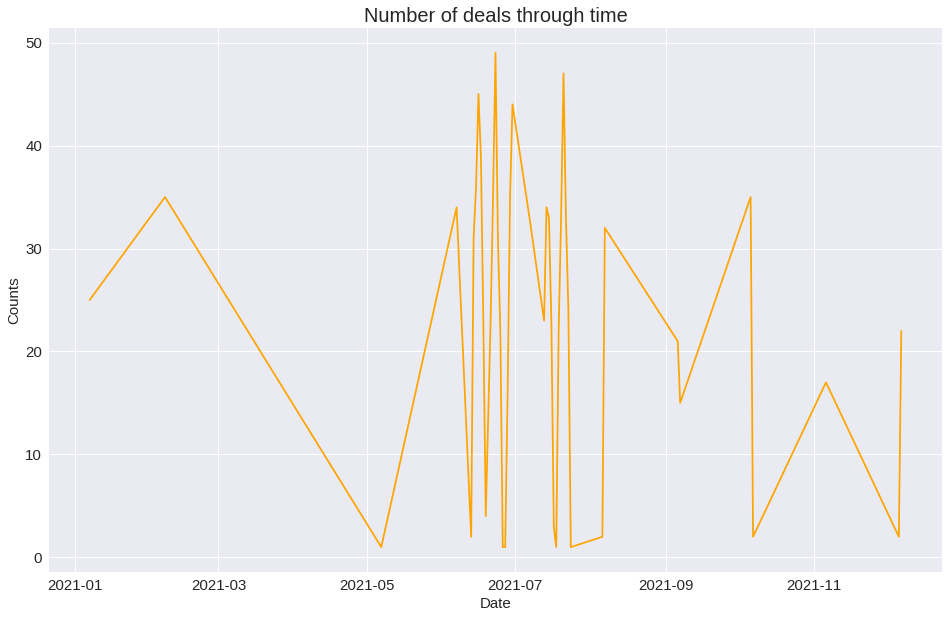

In [106]:
values = corolla18['Date of sale'].value_counts()
data = {}
for i in range(len(values)):
    data[values.index[i]]=values[i]
data = dict(sorted(data.items()))

plt.style.use('seaborn')
fig = plt.figure(figsize=(16,10))
plt.plot(data.keys(),data.values(),color='orange')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Number of deals through time',fontsize=20)
plt.show()
fig.savefig('Number_of_deals_through_time.jpg')

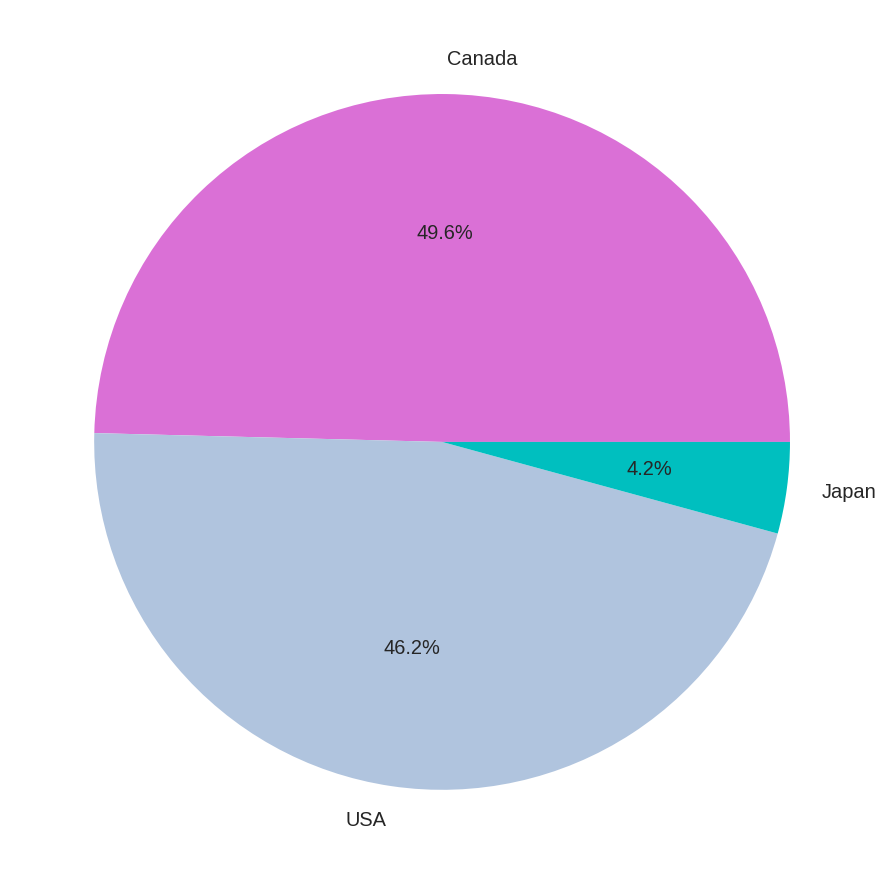

In [107]:
def func(string):
    if string[0]=='J':
        return 'Japan'
    elif string[0]=='2':
        return 'Canada'
    elif string[0]=='5':
        return 'USA'
    else:
        return None
data = corolla18['VIN'].apply(func)
fig=plt.figure(figsize=(20,16))
plt.pie(data.value_counts(),labels=data.value_counts().index.to_list(),autopct='%1.1f%%',textprops={'fontsize':20},colors=['orchid','lightsteelblue','c'])
plt.show()
fig.savefig('Ratio_by_country_manufacturers.jpg')

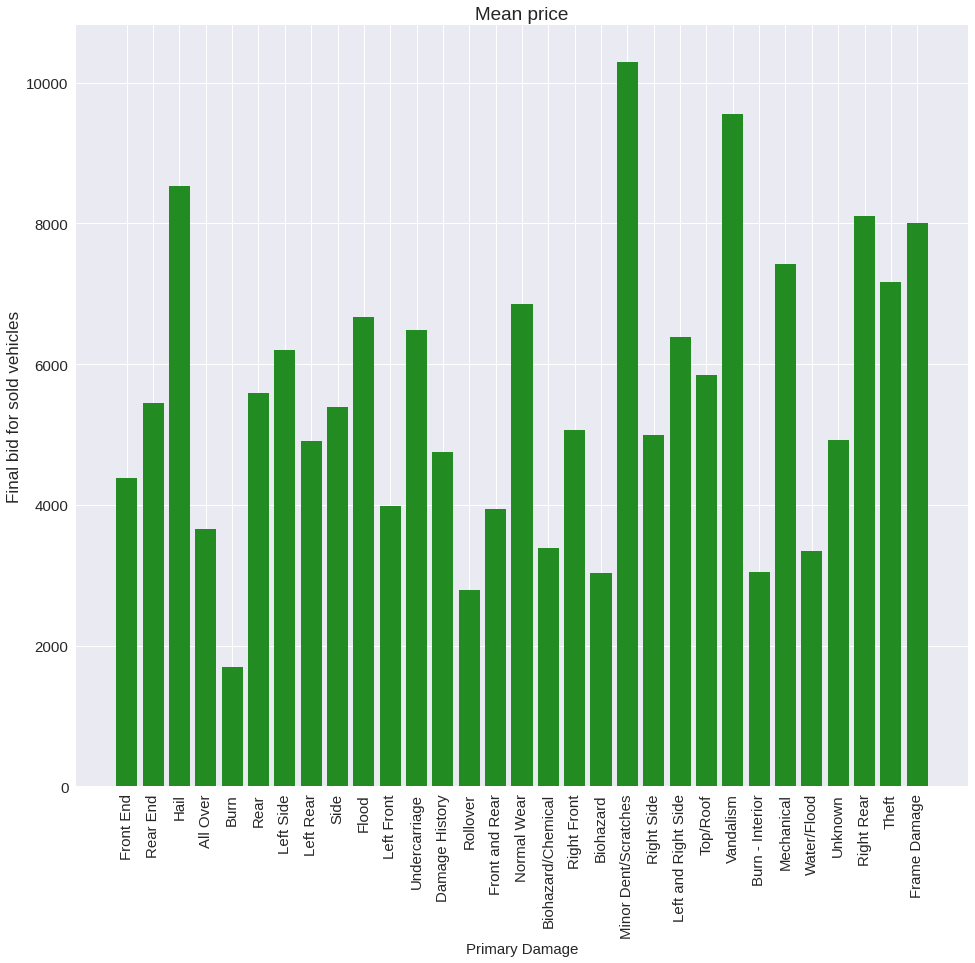

In [151]:
fig = plt.figure(figsize=(16,14))
x = corolla18[corolla18['Sold status']=='Sold']['Primary Damage']
y=[]
for dmg in x:
    y.append(corolla18[(corolla18['Sold status']=='Sold') & (corolla18['Primary Damage']==dmg)]['Final bid'].mean())
plt.bar(x,y,color='forestgreen')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Primary Damage',fontsize=15)
plt.ylabel('Final bid for sold vehicles',fontsize=17)
plt.title('Mean price',fontsize=19)
plt.show()
fig.savefig('Mean_price_of_sold_cars.jpg')

J
(33,)
2
(359,)
5
(315,)


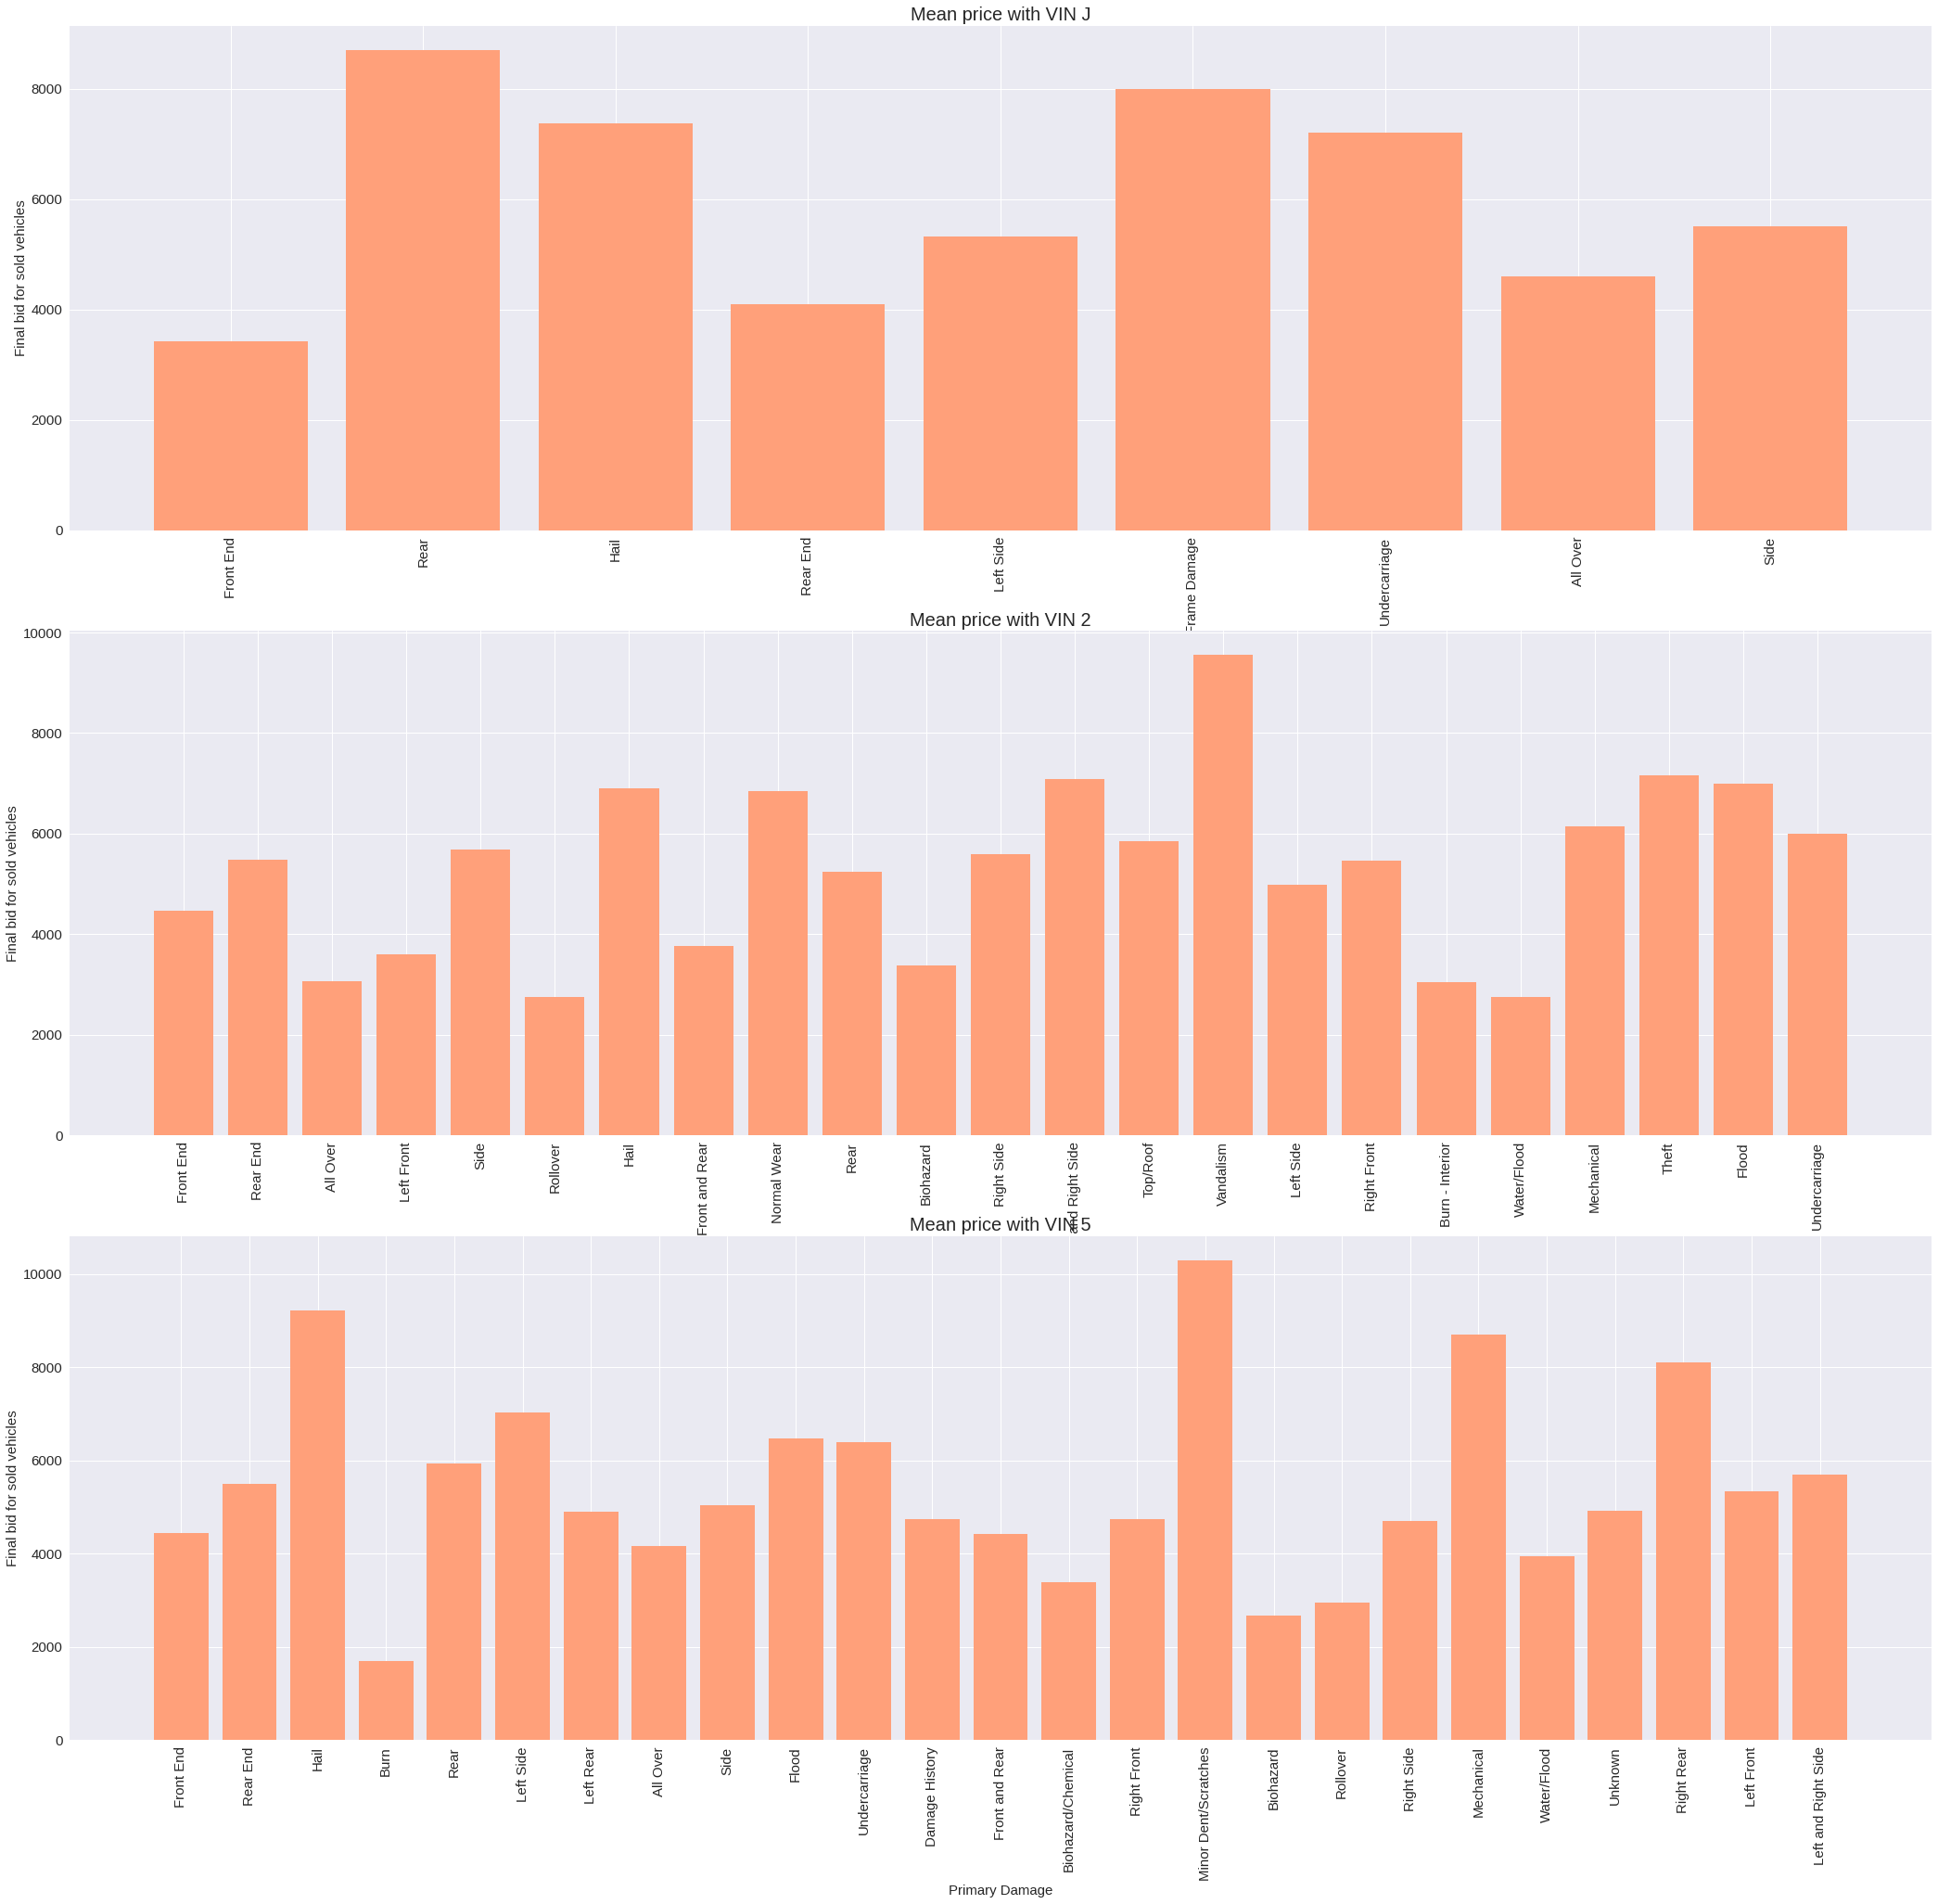

In [152]:
fig = plt.figure(1,figsize=(36,34))
vins = ['J','2','5']
count = 1
for VIN in vins:
    print(VIN)
    x = corolla18[(corolla18['Sold status']=='Sold') & (corolla18['VIN'].str.startswith(VIN))]['Primary Damage']
    y=[]
    for dmg in x:
        y.append(corolla18[(corolla18['Sold status']=='Sold') & (corolla18['Primary Damage']==dmg) & (corolla18['VIN'].str.startswith(VIN))]['Final bid'].mean())
    plt.subplot(int(str(31)+str(count)))
    print(x.shape)
    plt.bar(x,y,color='lightsalmon')
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Primary Damage',fontsize=15)
    plt.ylabel('Final bid for sold vehicles',fontsize=15)
    plt.title(f'Mean price with VIN {VIN}',fontsize=20)
    count+=1
plt.show()
fig.savefig('Mean_price_of_sold_cars_by_VIN.jpg')

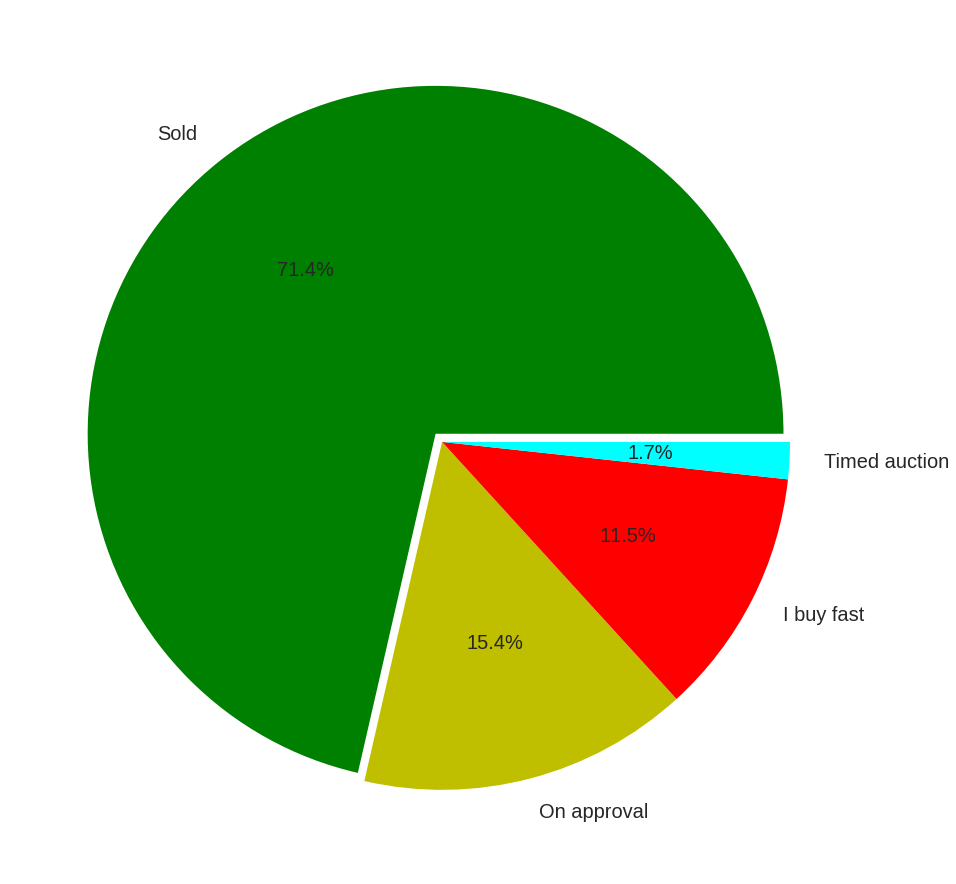

In [110]:
data = corolla18['Sold status']
plt.figure(figsize=(20,16))
pie = plt.pie(data.value_counts(),labels=data.value_counts().index.to_list(),autopct='%1.1f%%',explode=[0.03,0,0,0],colors=['g','y','r','cyan'],textprops={'size':20})
plt.savefig('Sold_status.jpg')

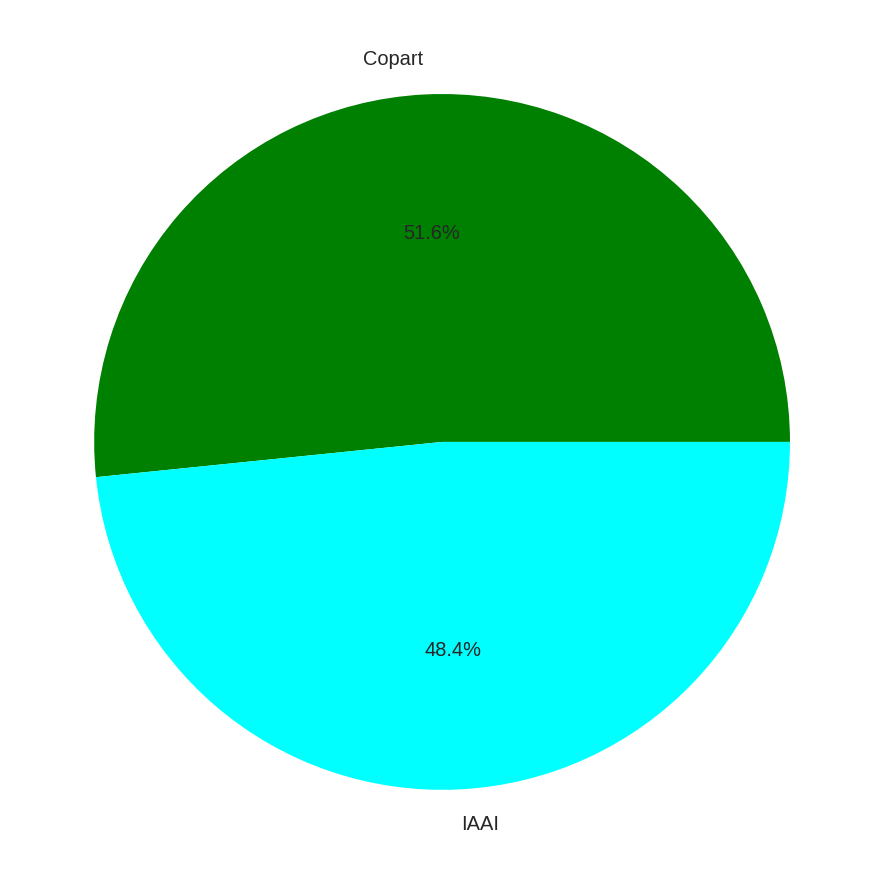

In [111]:
data = corolla18['Auction']
plt.figure(figsize=(20,16))
plt.pie(data.value_counts(),labels=data.value_counts().index.to_list(),autopct='%1.1f%%',explode=[0,0],colors=['g','cyan'],textprops={'size':20})
plt.savefig('Auctions.jpg')

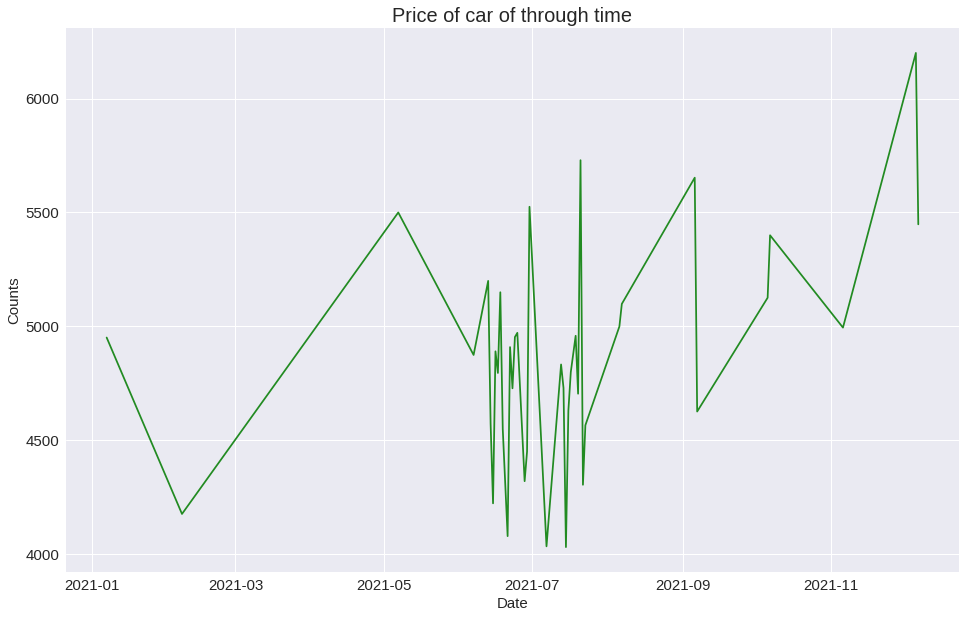

In [141]:
dates = corolla18[corolla18['Sold status']=='Sold']['Date of sale'].value_counts().index
data = {}
for index in dates:
    data[index]=corolla18[(corolla18['Sold status']=='Sold') & (corolla18['Date of sale']==index)]['Final bid'].mean()
data = dict(sorted(data.items()))
"""for (k,v) in data.items():
    print(k,v)"""
plt.style.use('seaborn')
fig = plt.figure(figsize=(16,10))
plt.plot(data.keys(),data.values(),color='forestgreen')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Price of car of through time',fontsize=20)
plt.show()
fig.savefig('Price_of_sold_car_through_time.jpg')

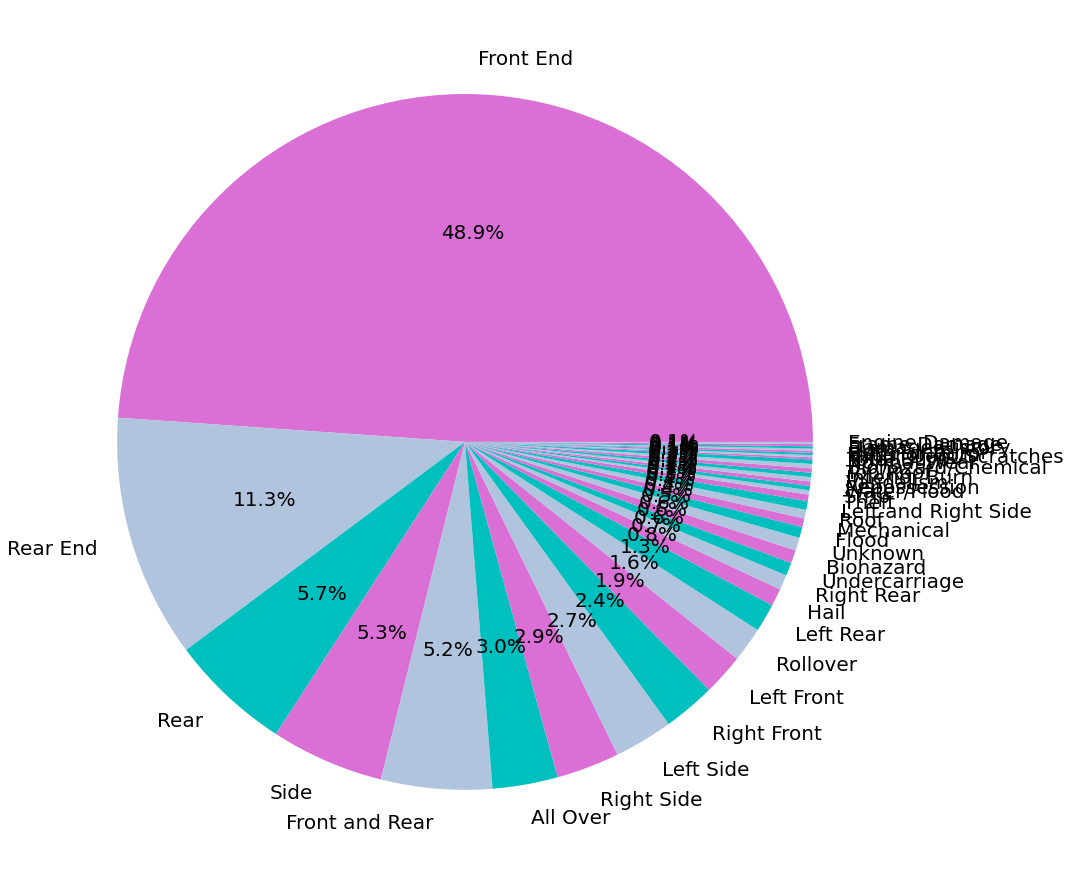

In [3]:
data = corolla18['Primary Damage']
fig=plt.figure(figsize=(20,16))
plt.pie(data.value_counts(),labels=data.value_counts().index.to_list(),autopct='%1.1f%%',textprops={'fontsize':20},colors=['orchid','lightsteelblue','c'])
plt.show()
#fig.savefig('Ratio_by_country_manufacturers.jpg')

In [4]:
len(corolla18[corolla18['Primary Damage']=="Hail"])

8

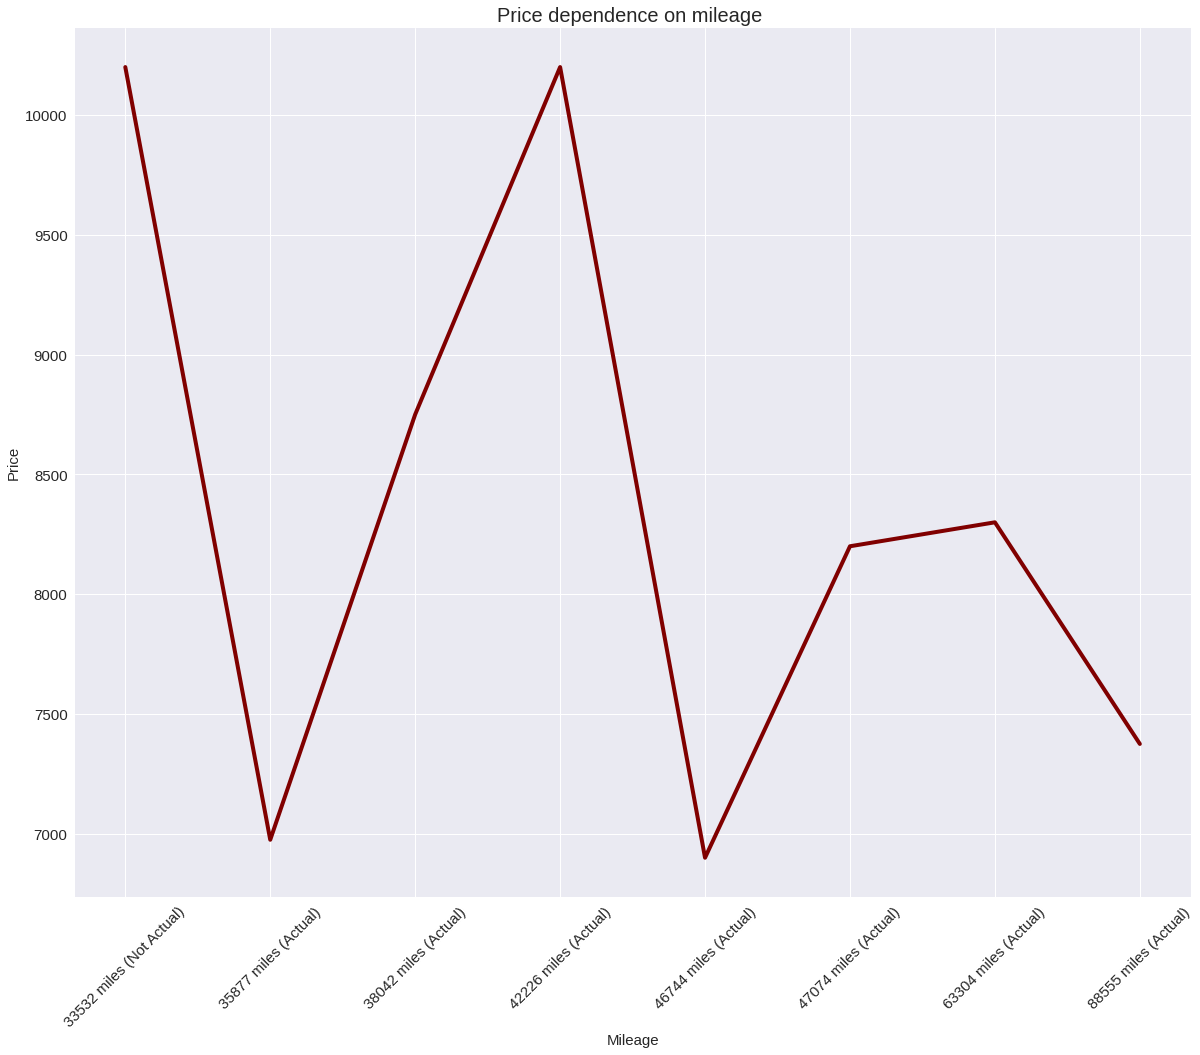

In [14]:
mileages = corolla18[corolla18['Primary Damage']=="Hail"]['Mileage'].value_counts().index
data = {}
for miles in mileages:
    data[miles]=corolla18[(corolla18['Primary Damage']=="Hail") & (corolla18['Mileage']==miles)]['Final bid'].mean()
data = dict(sorted(data.items()))
plt.style.use('seaborn')
fig=plt.figure(figsize=(20,16))
plt.xlabel('Mileage',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.title('Price dependence on mileage ',fontsize=20)
plt.plot(data.keys(),data.values(),color='maroon',linewidth=4)
fig.savefig('Price_dependence_on_mileage(Hail_primary_damage)_2018.jpg')

In [12]:
len(corolla18[(corolla18['Primary Damage']=="Hail") & (corolla18['Sold status']=='Sold')])

6